### Imports

In [56]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import normaltest
import seaborn as sns

## Inputs

In [2]:
filepath = 'data/IFC-POWER_BI.csv'
out_dir = 'outputs'
outlier_factor = 3

In [3]:
df = pd.read_csv(filepath, sep=';')
df = df.set_index('GUID')
df.head()

C:\Users\dgm\AppData\Local\Temp\ipykernel_20684\1661632698.py:1: DtypeWarning: Columns (2,3,4,5,6,7,17,18,19,20,32,34,35,36,37,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=';')


,Model,ExtrusionX (mm),ExtrusionY (mm),ExtrusionZ (mm),OriginX (mm),OriginY (mm),OriginZ (mm),XDirX,XDirY,XDirZ,...,HEIGHT (mm),AREA_PGZ (m²),AREA (m²),PROFILE,WIDTH (mm),WEIGHT (t),PROFILE.CROSS_SECTION_AREA (m²),Common Type,LU Pos.Number,DU Pos.Number
GUID,,,,,,,,,,,,,,,,,,,,,
3Mv$UOTqD9EvWHVMq8frFc,D3D-FHE-62-0-100-0100.ifc,--,--,--,--,--,--,NaN,NaN,NaN,...,--,--,--,D18,--,0.0,--,MECHANICALFASTENER,NaN,NaN
15Rplo6$D6z9$_ZJg$mSO3,D3D-FHE-62-0-100-0100.ifc,--,--,--,--,--,--,NaN,NaN,NaN,...,--,--,--,D18,--,0.0,--,MECHANICALFASTENER,NaN,NaN
3pRgtIyjn6_OxTS1U2DxyP,D3D-FHE-62-0-100-0100.ifc,--,--,--,--,--,--,NaN,NaN,NaN,...,--,--,--,D18,--,0.0,--,MECHANICALFASTENER,NaN,NaN
3gZuyFNqr2W9mTmQr0TiJI,D3D-FHE-62-0-100-0100.ifc,--,--,--,--,--,--,NaN,NaN,NaN,...,--,--,--,D18,--,0.0,--,MECHANICALFASTENER,NaN,NaN
0onthEMq14_Ohw7ELHHzzY,D3D-FHE-62-0-100-0100.ifc,--,--,--,--,--,--,NaN,NaN,NaN,...,--,--,--,D18,--,0.0,--,MECHANICALFASTENER,NaN,NaN


In [4]:
_decimal_cols = ('ExtrusionX (mm)', 'ExtrusionY (mm)', 'ExtrusionZ (mm)', 'OriginX (mm)', 'OriginY (mm)', 'OriginZ (mm)',
'XDirX', 'XDirY', 'XDirZ', 'CenterOfGravityX (mm)', 'CenterOfGravityY (mm)', 'CenterOfGravityZ (mm)',
'Volume (m³)', 'LENGTH (mm)', 'VOLUME (m³)', 'HEIGHT (mm)', 'AREA_PGZ (m²)', 'AREA (m²)', 'WIDTH (mm)', 'WEIGHT (t)', 'PROFILE.CROSS_SECTION_AREA (m²)')
for col in _decimal_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [5]:
df.describe()

,ExtrusionX (mm),ExtrusionY (mm),ExtrusionZ (mm),OriginX (mm),OriginY (mm),OriginZ (mm),XDirX,XDirY,XDirZ,CenterOfGravityX (mm),...,LENGTH (mm),VOLUME (m³),HEIGHT (mm),AREA_PGZ (m²),AREA (m²),WIDTH (mm),WEIGHT (t),PROFILE.CROSS_SECTION_AREA (m²),LU Pos.Number,DU Pos.Number
count,68778.000000,68778.000000,68778.000000,68778.000000,68778.000000,68778.000000,68778.000000,68778.000000,68778.000000,73095.000000,...,99735.000000,73095.000000,73095.000000,73095.000000,73095.000000,73095.000000,99735.000000,73095.000000,6282.0,6282.000000
mean,26.788246,34.155064,-46.386388,163064.627206,47418.582483,14249.135785,-0.020516,0.046137,0.040834,163073.814105,...,563.366902,0.004935,170.926944,0.186403,0.655927,37.662302,0.020155,0.001281,999.0,924.521490
std,1267.890666,982.521674,718.348348,14564.369910,12275.742075,10069.287284,0.654881,0.597477,0.458203,14580.323078,...,1422.566265,0.070354,213.104279,2.343802,4.994154,57.265067,0.137315,0.004930,0.0,42.738914
min,-37572.000000,-30895.000000,-19002.000000,135186.000000,19150.000000,-4007.000000,-1.000000,-1.000000,-1.000000,135186.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,999.0,900.000000
25%,0.000000,0.000000,0.000000,151085.000000,38094.000000,6798.000000,-0.000002,0.000000,0.000000,151025.000000,...,70.000000,0.000000,77.000000,0.000000,0.040000,8.000000,0.000000,0.000000,999.0,900.000000
50%,0.000000,0.000000,0.000000,162618.000000,46715.000000,12310.000000,0.000000,0.000000,0.000000,162594.000000,...,176.000000,0.000000,150.000000,0.000000,0.090000,15.000000,0.002000,0.000000,999.0,900.000000
75%,0.000000,0.000000,0.000000,174403.000000,55237.500000,20651.000000,0.000000,0.000000,0.000000,174576.000000,...,448.000000,0.000000,200.000000,0.040000,0.230000,48.000000,0.006000,0.000000,999.0,900.000000
max,37571.000000,25118.000000,11115.000000,236221.000000,81010.000000,44171.000000,1.000000,1.000000,1.000000,236226.000000,...,37572.000000,11.400000,11620.000000,380.120000,766.400000,450.000000,15.471000,0.200000,999.0,999.000000


In [6]:
df_num = df.select_dtypes(include=np.number)

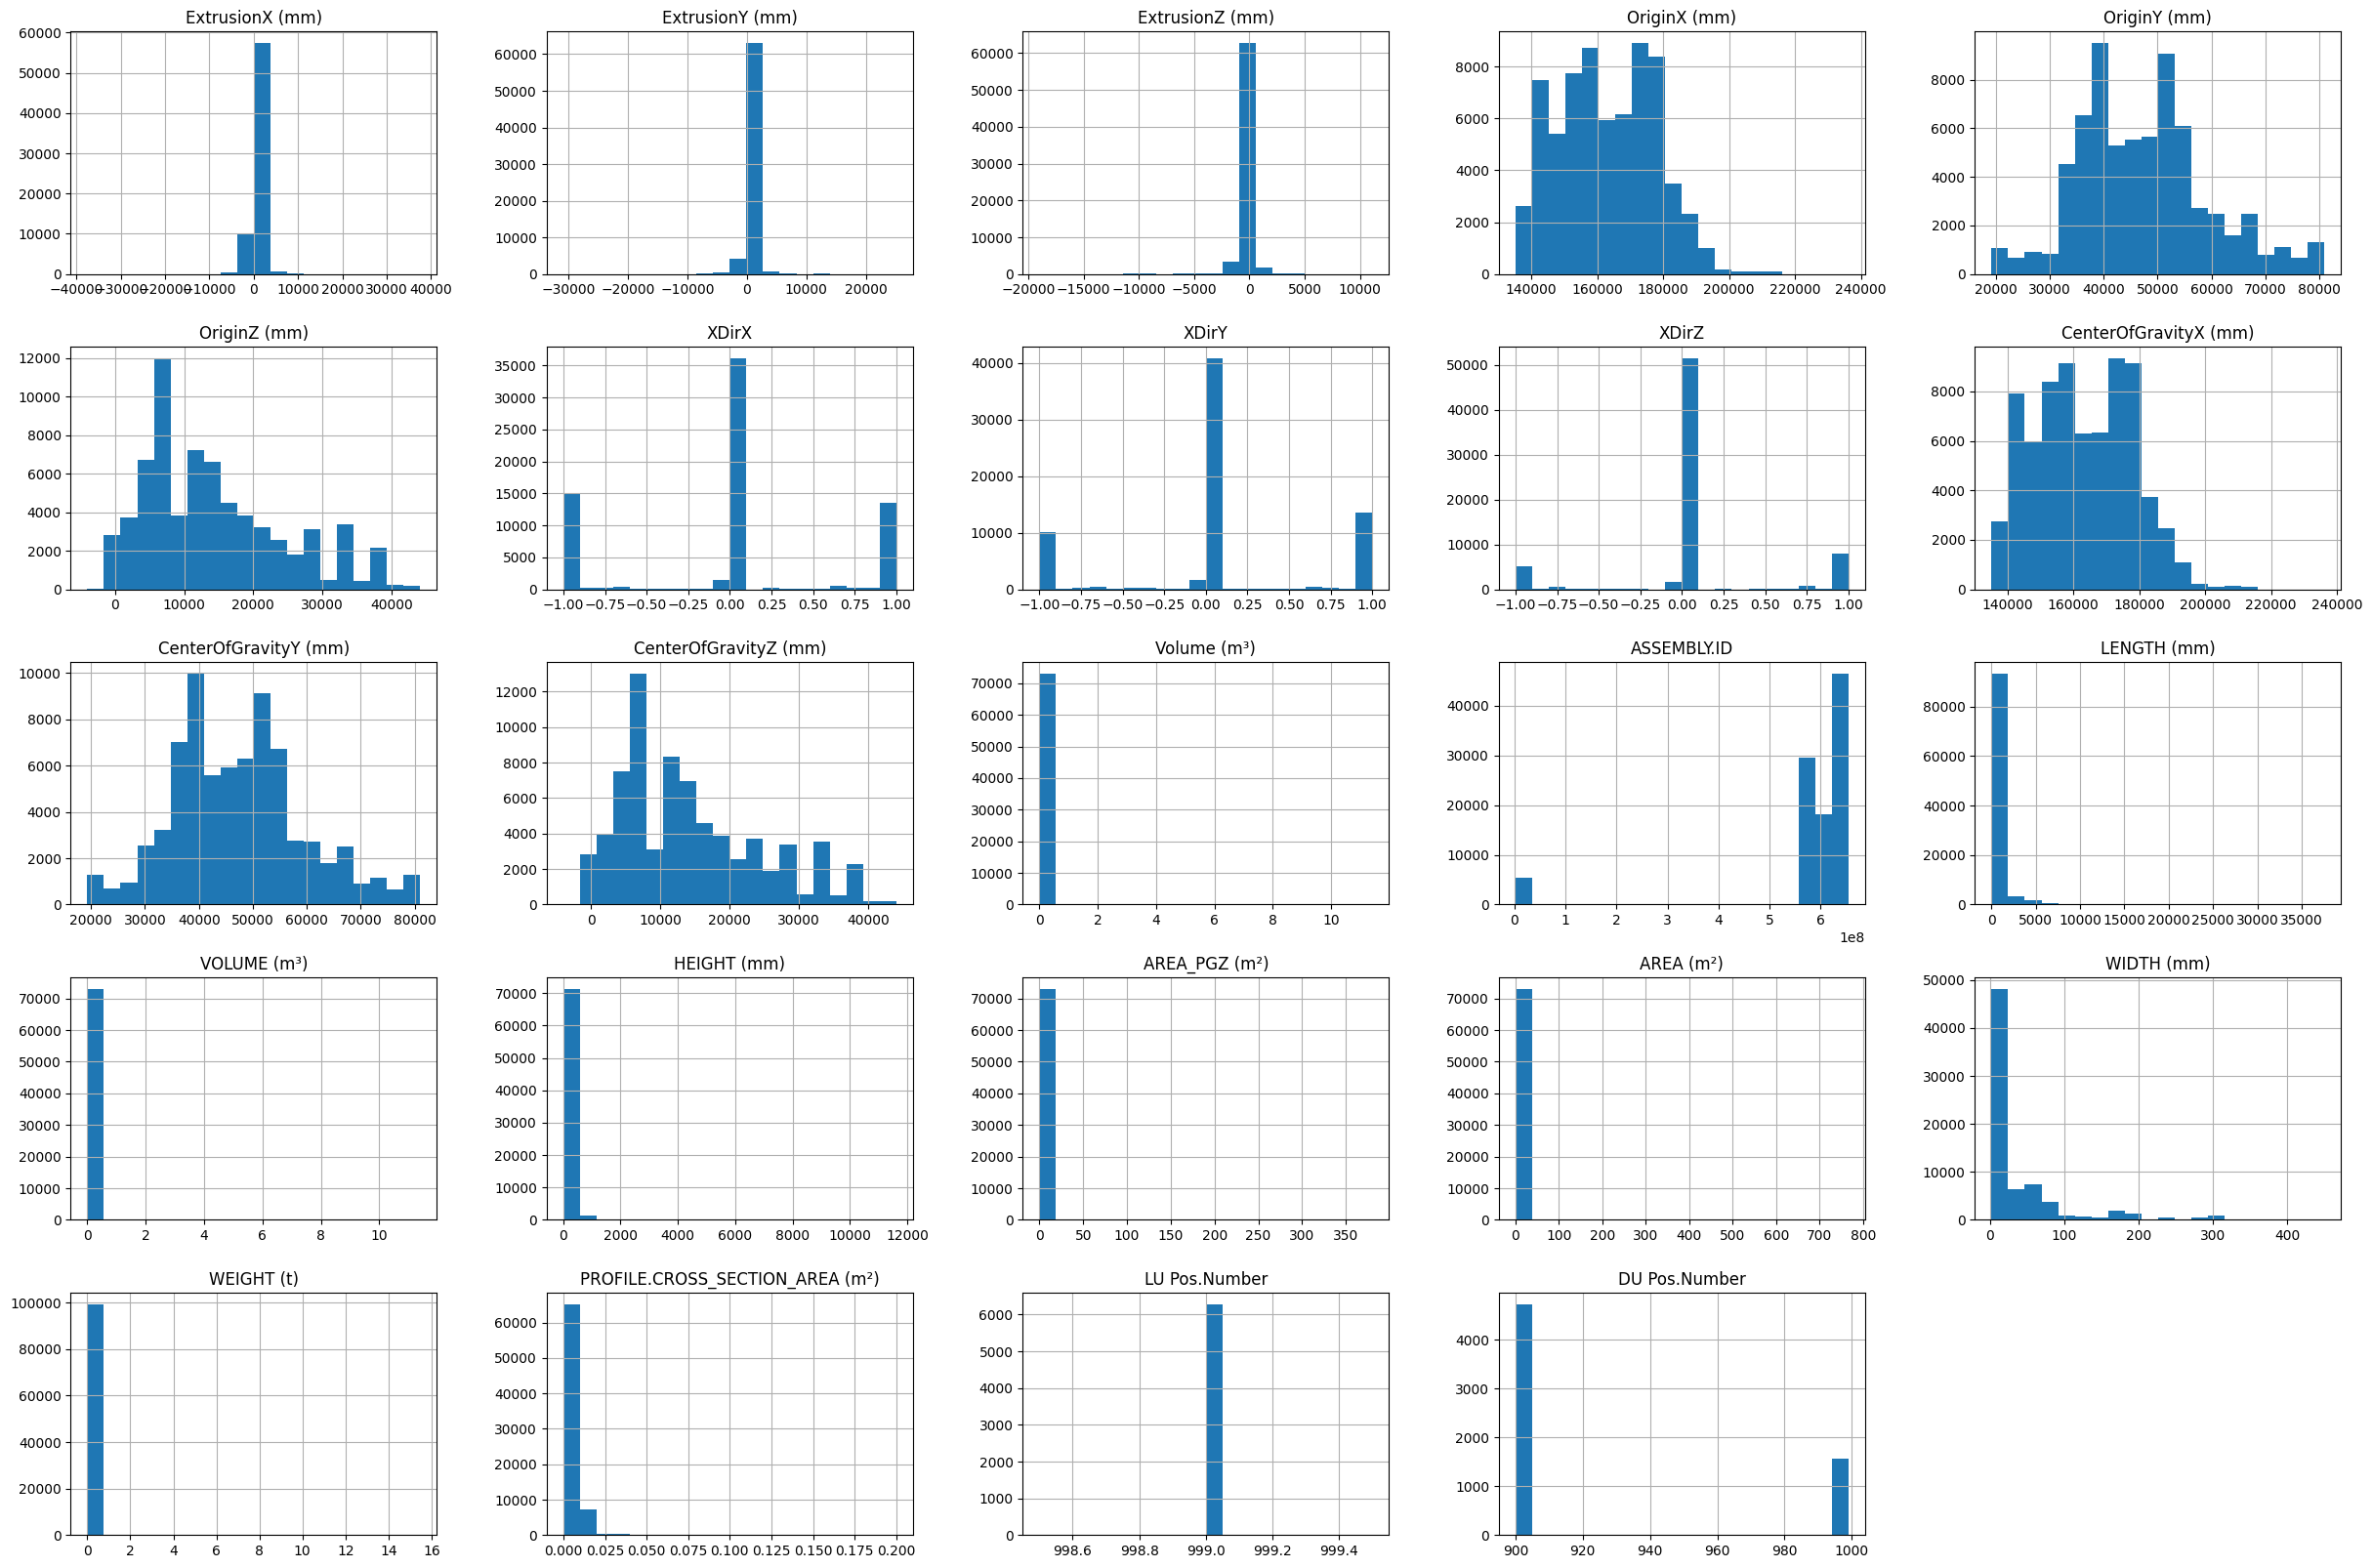

In [7]:
df_num.hist(figsize=(30,20), bins=20);

In [72]:
_alpha = 1 - 1E-3

for col in df_num.columns:
    _k2, _p = normaltest(df_num[col], nan_policy='omit')
    if _p < _alpha:
        print(f'El atributo {col} NO sigue una distribución normal con un {_alpha*100}% de confianza.')
    else:
        print(f'No se puede confirmar que el atributo {col} NO siga una distribución normal con un {_alpha*100}% de confianza.')

El atributo ExtrusionX (mm) NO sigue una distribución normal con un 99.9% de confianza.
El atributo ExtrusionY (mm) NO sigue una distribución normal con un 99.9% de confianza.
El atributo ExtrusionZ (mm) NO sigue una distribución normal con un 99.9% de confianza.
El atributo OriginX (mm) NO sigue una distribución normal con un 99.9% de confianza.
El atributo OriginY (mm) NO sigue una distribución normal con un 99.9% de confianza.
El atributo OriginZ (mm) NO sigue una distribución normal con un 99.9% de confianza.
El atributo XDirX NO sigue una distribución normal con un 99.9% de confianza.
El atributo XDirY NO sigue una distribución normal con un 99.9% de confianza.
El atributo XDirZ NO sigue una distribución normal con un 99.9% de confianza.
El atributo CenterOfGravityX (mm) NO sigue una distribución normal con un 99.9% de confianza.
El atributo CenterOfGravityY (mm) NO sigue una distribución normal con un 99.9% de confianza.
El atributo CenterOfGravityZ (mm) NO sigue una distribución

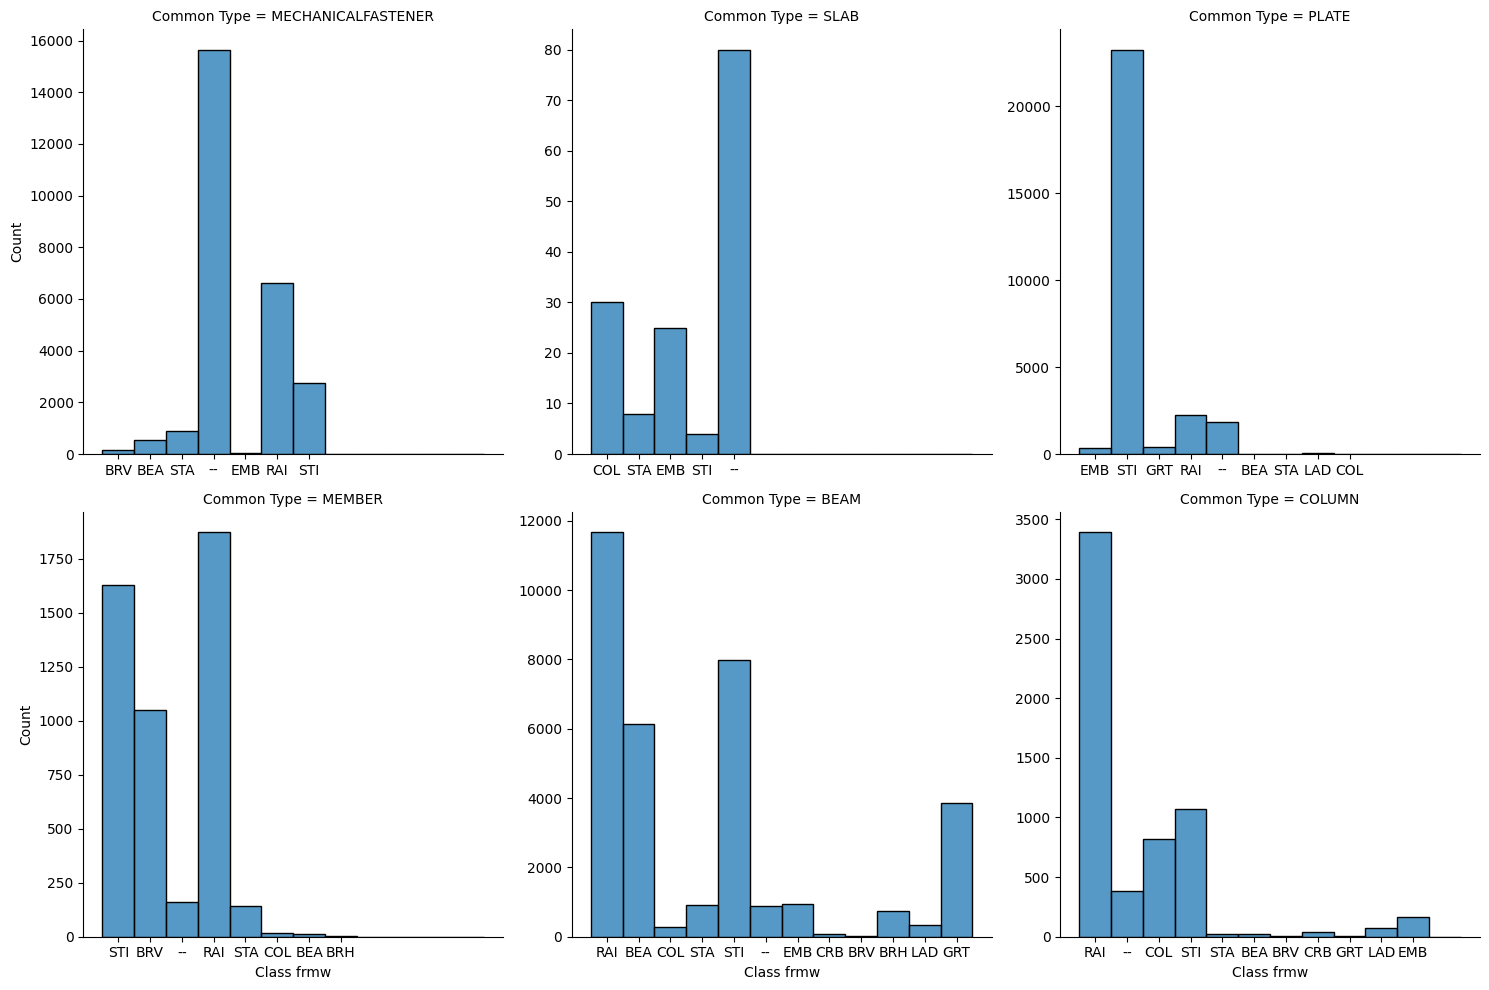

In [92]:
_cross_cols = ['Class frmw', 'Common Type']
_df_cross = df[_cross_cols].dropna()

_fig = sns.displot(_df_cross, x='Class frmw', col='Common Type', 
                   col_wrap=3, facet_kws=dict(sharex=False, sharey=False));

_df_comb = _df_cross.value_counts().reset_index(name='count')
_df_comb.index.name = 'Index'
_df_comb = _df_comb.sort_values([_cross_cols[0], 'count'], ascending=[True, False])

_filepath = os.path.join(out_dir, f'{_cross_cols[0]}_x_{_cross_cols[1]}.csv')
_df_comb.to_csv(_filepath, sep=';')